In [ ]:
import re
import pandas as pd

# Read the log file
log_file_path = '/content/drive/MyDrive/Linux.log'  # Path to your log file

# Define regex pattern to match each line in the log
log_pattern = r'(\w+\s+\d+\s+\d+:\d+:\d+)\s+(\w+)\s+(\w+):\s+(.*)'

# Lists to store each part of the log entry
timestamps = []
hosts = []
log_levels = []
messages = []

# Open and parse the log file line by line
# Open and parse the log file line by line with specified encoding
with open(log_file_path, 'r', encoding='ISO-8859-1') as file:
    for line in file:
        match = re.match(log_pattern, line)
        if match:
            timestamps.append(match.group(1))   # e.g., Jun 9 06:06:20
            hosts.append(match.group(2))        # e.g., combo
            log_levels.append(match.group(3))   # e.g., syslog or kernel
            messages.append(match.group(4))     # e.g., syslogd startup succeeded


# Create a DataFrame from the parsed data
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Host': hosts,
    'Log_Level': log_levels,
    'Message': messages
})

# Save DataFrame to CSV
csv_file = '/content/drive/MyDrive/linux_logs.csv'  # Path to save your CSV
df.to_csv(csv_file, index=False)

print(f"Log data has been successfully saved to {csv_file}")


Log data has been successfully saved to /content/drive/MyDrive/linux_logs.csv


In [ ]:
import pandas as pd
import re

# List of sensitive files to monitor
sensitive_files = ['/etc/sshd_config', '/etc/passwd', '/etc/shadow']

# Keywords for process activity (e.g., package install/removal)
package_commands = ['apt-get install', 'yum install', 'dpkg', 'rpm']

# Keywords for file access actions (e.g., delete, move, copy)
file_actions = ['rm', 'mv', 'cp']

# List of authorized users
authorized_users = ['root', 'admin', 'sysadmin']

# Function to check for login failure patterns
def check_login_failure(log_message):
    if 'failed' in log_message and 'login' in log_message:
        return True
    return False

# Function to check for sudo command execution by non-privileged users
def check_sudo_execution(log_message):
    for user in authorized_users:
        if user not in log_message and 'sudo' in log_message:
            return True
    return False

# Function to check for file manipulation activities (delete, move, copy)
def check_file_access_patterns(log_message):
    if any(action in log_message for action in file_actions):
        return True
    return False

# Function to detect network activity (outbound traffic, suspicious ports)
def check_network_activity(log_message):
    if 'ssh' in log_message or 'iptables' in log_message or 'netstat' in log_message:
        return True
    return False

# Function to check changes in critical system files
def check_system_file_changes(log_message):
    for file in sensitive_files:
        if file in log_message:
            return True
    return False

# Function to process each log and extract features
def extract_features(log_message):
    features = {}

    # Ensure the log message is a string
    log_message = str(log_message)

    # Check for login failure
    features['login_failure'] = check_login_failure(log_message)

    # Check for sudo command execution by non-privileged users
    features['sudo_execution'] = check_sudo_execution(log_message)

    # Check for file manipulation (delete, move, copy)
    features['file_access'] = check_file_access_patterns(log_message)

    # Check for network activity
    features['network_activity'] = check_network_activity(log_message)

    # Check for changes in critical system files
    features['system_file_changes'] = check_system_file_changes(log_message)

    return features

# Simple labeling based on specific features (can be improved with more conditions)
def label_log(features):
    # Anomaly if there are login failures, sudo command usage, or file manipulations
    if features['login_failure'] or features['sudo_execution'] or features['file_access'] or features['network_activity'] or features['system_file_changes']:
        return 'Anomaly'
    return 'Normal'

# Load the CSV file with unique log combinations
unique_log_file_path = '/content/drive/MyDrive/unique_log_combinations.csv'
log_df = pd.read_csv(unique_log_file_path)

# Clean the data: fill NaN values in the Message column with empty strings
log_df['Message'] = log_df['Message'].fillna('')

# Combine Log_level and Message into a single text column
log_df['text'] = log_df['Log_Level'] + ' ' + log_df['Message']

# Extract features and label logs
log_features = log_df['text'].apply(extract_features)

# Convert the features into separate columns
log_features_df = pd.DataFrame(log_features.tolist())

# Apply the labeling function
log_df['Label'] = log_features_df.apply(lambda row: label_log(row), axis=1)

# Save the labeled data to a new CSV file with all columns
labeled_log_file_path = '/content/drive/MyDrive/labeled_logs_linux.csv'
log_df[['Timestamp', 'Host', 'Log_Level', 'Message', 'Label']].to_csv(labeled_log_file_path, index=False)

print(f"Labeled log entries with all columns have been saved to {labeled_log_file_path}.")


Labeled log entries with all columns have been saved to /content/drive/MyDrive/labeled_logs_linux.csv.


In [ ]:
import pandas as pd

# Load the CSV file with columns 'Log_level' and 'Message'
log_file_path = '/content/drive/MyDrive/linux_logs.csv'
log_df = pd.read_csv(log_file_path)

# Drop duplicate rows to get unique combinations of Log_level and Message
unique_combinations_df = log_df.drop_duplicates(subset=['Log_Level', 'Message'])

# Save the unique combinations to a new CSV file
output_file_path = '/content/drive/MyDrive/unique_log_combinations.csv'
unique_combinations_df.to_csv(output_file_path, index=False)

print(f"Unique log level and message combinations have been saved to {output_file_path}.")


Unique log level and message combinations have been saved to /content/drive/MyDrive/unique_log_combinations.csv.


In [ ]:
import pandas as pd
import re

# List of sensitive files to monitor
sensitive_files = ['/etc/sshd_config', '/etc/passwd', '/etc/shadow']

# Keywords for process activity (e.g., package install/removal)
package_commands = ['apt-get install', 'yum install', 'dpkg', 'rpm']

# Keywords for file access actions (e.g., delete, move, copy)
file_actions = ['rm', 'mv', 'cp']

# List of authorized users
authorized_users = ['root', 'admin', 'sysadmin']

# Function to check for login failure patterns
def check_login_failure(log_message):
    if 'failed' in log_message and 'login' in log_message:
        return True
    return False

# Function to check for sudo command execution by non-privileged users
def check_sudo_execution(log_message):
    for user in authorized_users:
        if user not in log_message and 'sudo' in log_message:
            return True
    return False

# Function to check for file manipulation activities (delete, move, copy)
def check_file_access_patterns(log_message):
    if any(action in log_message for action in file_actions):
        return True
    return False

# Function to detect network activity (outbound traffic, suspicious ports)
def check_network_activity(log_message):
    if 'ssh' in log_message or 'iptables' in log_message or 'netstat' in log_message:
        return True
    return False

# Function to check changes in critical system files
def check_system_file_changes(log_message):
    for file in sensitive_files:
        if file in log_message:
            return True
    return False

# Function to aggregate the number of failed logins or sudo attempts
def aggregate_failed_logins(log_df):
    failed_logins = log_df[log_df['Message'].str.contains('failed login', na=False)]
    return failed_logins.groupby(['Log_level']).size()

# Function to aggregate sudo commands
def aggregate_sudo_commands(log_df):
    sudo_commands = log_df[log_df['Message'].str.contains('sudo', na=False)]
    return sudo_commands.groupby(['Log_level']).size()

# Function to process each log and extract features
def extract_features(log_message):
    features = {}

    # Ensure the log message is a string
    log_message = str(log_message)

    # Check for login failure
    features['login_failure'] = check_login_failure(log_message)

    # Check for sudo command execution by non-privileged users
    features['sudo_execution'] = check_sudo_execution(log_message)

    # Check for file manipulation (delete, move, copy)
    features['file_access'] = check_file_access_patterns(log_message)

    # Check for network activity
    features['network_activity'] = check_network_activity(log_message)

    # Check for changes in critical system files
    features['system_file_changes'] = check_system_file_changes(log_message)

    return features

# Simple labeling based on specific features (can be improved with more conditions)
def label_log(features):
    # Anomaly if there are login failures, sudo command usage, or file manipulations
    if features['login_failure'] or features['sudo_execution'] or features['file_access'] or features['network_activity'] or features['system_file_changes']:
        return 'Anomaly'
    return 'Normal'

# Load the CSV file with unique log combinations
unique_log_file_path = '/content/drive/MyDrive/unique_log_combinations.csv'
log_df = pd.read_csv(unique_log_file_path)

# Clean the data: fill NaN values in the Message column with empty strings
log_df['Message'] = log_df['Message'].fillna('')

# Combine Log_level and Message into a single text column
log_df['text'] = log_df['Log_Level'] + ' ' + log_df['Message']

# Extract features and label logs
log_features = log_df['text'].apply(extract_features)

# Convert the features into separate columns
log_features_df = pd.DataFrame(log_features.tolist())

# Apply the labeling function
log_df['Label'] = log_features_df.apply(lambda row: label_log(row), axis=1)

# Save the labeled data to a new CSV file
labeled_log_file_path = '/content/drive/MyDrive/labeled_loge_new.csv'
log_df[['Log_Level', 'Message', 'Label']].to_csv(labeled_log_file_path, index=False)

print(f"Labeled log entries have been saved to {labeled_log_file_path}.")


Labeled log entries have been saved to /content/drive/MyDrive/labeled_loge_new.csv.


In [ ]:
!pip install tensorflow

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


403/403 ━━━━━━━━━━━━━━━━━━━━ 37s 83ms/step - accuracy: 0.8959 - loss: 0.2777 - val_accuracy: 0.9749 - val_loss: 0.0674
Epoch 2/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.9812 - loss: 0.0539 - val_accuracy: 0.9842 - val_loss: 0.0470
Epoch 3/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.9916 - loss: 0.0247 - val_accuracy: 0.9817 - val_loss: 0.0455
Epoch 4/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.9962 - loss: 0.0141 - val_accuracy: 0.9870 - val_loss: 0.0427
Epoch 5/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.9978 - loss: 0.0084 - val_accuracy: 0.9879 - val_loss: 0.0458
Epoch 6/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - accuracy: 0.9983 - loss: 0.0060 - val_accuracy: 0.9836 - val_loss: 0.0542
Epoch 7/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9867 - val_loss: 0.0487
Epoch 8/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9987 - loss: 0.0064 - val_accurac

RNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2014
           1       0.98      0.99      0.98      2016

    accuracy                           0.98      4030
   macro avg       0.98      0.98      0.98      4030
weighted avg       0.98      0.98      0.98      4030

RNN Confusion Matrix:
[[1973   41]
 [  26 1990]]


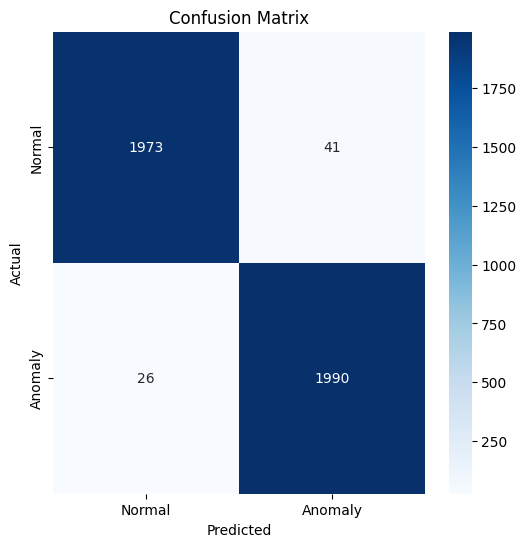

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/labeled_loge_new.csv')

# Step 1: Prepare data
data['Message'] = data['Message'].fillna('')  # Replace NaN with empty strings
data['Message'] = data['Message'].astype(str)  # Ensure all entries are strings

# Step 2: Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Message'])  # Create a vocabulary from the log messages
X_seq = tokenizer.texts_to_sequences(data['Message'])  # Convert messages to sequences of integers
X_pad = pad_sequences(X_seq, maxlen=100)  # Pad sequences to a fixed length

y = data['Label'].map({'Anomaly': 1, 'Normal': 0}).values  # Convert labels to binary

# Step 3: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Build and compile RNN model
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
embedding_dim = 50

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=100),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the RNN model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model
y_pred_rnn = (model.predict(X_test) > 0.5).astype("int32")  # Use 0.5 as the threshold
print("RNN Classification Report:")
print(classification_report(y_test, y_pred_rnn))
print("RNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rnn))

conf_matrix = confusion_matrix(y_test, y_pred_rnn)

# Specify the path where you want to save the model in Google Drive
model_save_path = '/content/drive/MyDrive/root/models/rnn_model_linux_20.h5'

# Save the model
model.save(model_save_path)

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(conf_matrix, class_names=["Normal", "Anomaly"])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


403/403 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.8745 - loss: 0.2710 - val_accuracy: 0.9764 - val_loss: 0.0630
Epoch 2/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9804 - loss: 0.0522 - val_accuracy: 0.9817 - val_loss: 0.0479
Epoch 3/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.9912 - loss: 0.0257 - val_accuracy: 0.9854 - val_loss: 0.0440
Epoch 4/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.9958 - loss: 0.0155 - val_accuracy: 0.9842 - val_loss: 0.0484
Epoch 5/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9977 - loss: 0.0090 - val_accuracy: 0.9870 - val_loss: 0.0501
Epoch 6/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 44s 82ms/step - accuracy: 0.9981 - loss: 0.0069 - val_accuracy: 0.9848 - val_loss: 0.0551
Epoch 7/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 39s 76ms/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9860 - val_loss: 0.0583
Epoch 8/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accurac

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2014
           1       0.98      0.99      0.98      2016

    accuracy                           0.98      4030
   macro avg       0.98      0.98      0.98      4030
weighted avg       0.98      0.98      0.98      4030

LSTM Confusion Matrix:
[[1972   42]
 [  24 1992]]


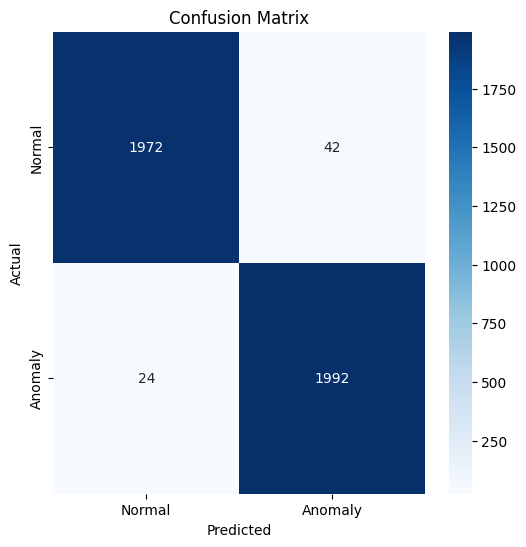

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/labeled_loge_new.csv')

# Step 1: Prepare data
data['Message'] = data['Message'].fillna('')  # Replace NaN with empty strings
data['Message'] = data['Message'].astype(str)  # Ensure all entries are strings

# Step 2: Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Message'])  # Create a vocabulary from the log messages
X_seq = tokenizer.texts_to_sequences(data['Message'])  # Convert messages to sequences of integers
X_pad = pad_sequences(X_seq, maxlen=100)  # Pad sequences to a fixed length

# Step 3: Convert labels to binary (Anomaly: 1, Normal: 0)
y = data['Label'].map({'Anomaly': 1, 'Normal': 0}).values

# Step 4: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Build the LSTM model
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
embedding_dim = 50  # Dimension for the embedding layer

model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=100),  # Embedding layer
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer with dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Step 7: Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the LSTM model
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 9: Evaluate the LSTM model
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")  # Use 0.5 as the threshold

# Step 10: Print classification report and confusion matrix
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))
print("LSTM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))
conf_matrix=confusion_matrix(y_test, y_pred_lstm)

# Specify the path where you want to save the model in Google Drive
model_save_path = '/content/drive/MyDrive/root/models/lstm_model_linux_20.h5'

# Save the model
model.save(model_save_path)

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(conf_matrix, class_names=["Normal", "Anomaly"])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


403/403 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8882 - loss: 0.2684 - val_accuracy: 0.9833 - val_loss: 0.0459
Epoch 2/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9913 - loss: 0.0256 - val_accuracy: 0.9885 - val_loss: 0.0303
Epoch 3/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9987 - loss: 0.0066 - val_accuracy: 0.9904 - val_loss: 0.0281
Epoch 4/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9901 - val_loss: 0.0296
Epoch 5/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9904 - val_loss: 0.0315
Epoch 6/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 1.0000 - loss: 4.7400e-04 - val_accuracy: 0.9898 - val_loss: 0.0340
Epoch 7/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 1.0000 - loss: 2.2494e-04 - val_accuracy: 0.9898 - val_loss: 0.0369
Epoch 8/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 1.0000 - loss: 3.0054e-04 - val

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2014
           1       0.99      0.99      0.99      2016

    accuracy                           0.99      4030
   macro avg       0.99      0.99      0.99      4030
weighted avg       0.99      0.99      0.99      4030

CNN Confusion Matrix:
[[1986   28]
 [  13 2003]]


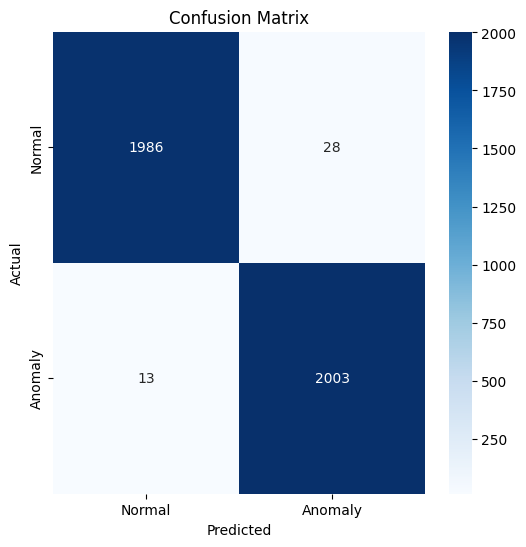

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/labeled_loge_new.csv')

# Step 1: Prepare data (same as your current setup)
data['Message'] = data['Message'].fillna('')
data['Message'] = data['Message'].astype(str)

# Step 2: Tokenize and pad sequences (same as your current setup)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Message'])
X_seq = tokenizer.texts_to_sequences(data['Message'])
X_pad = pad_sequences(X_seq, maxlen=100)

y = data['Label'].map({'Anomaly': 1, 'Normal': 0}).values

#Step 3: Apply SMOTE (same as your current setup)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y)

vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
embedding_dim = 50

#Step 4: Split the data (same as your current setup)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Build and compile CNN model
model_cnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=100),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the CNN model
history_cnn = model_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the CNN model
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))
print("CNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))

# Specify the path where you want to save the model in Google Drive
model_save_path = '/content/drive/MyDrive/root/models/cnn_model_linux_20.h5'

# Save the model
model_cnn.save(model_save_path)

conf_matrix=confusion_matrix(y_test, y_pred_cnn)

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(conf_matrix, class_names=["Normal", "Anomaly"])


630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Anomaly predictions saved to: /content/drive/MyDrive/linux_detected_anomalies_1.csv
Prediction Accuracy: 0.9636
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10074
           1       0.93      1.00      0.96     10074

    accuracy                           0.96     20148
   macro avg       0.97      0.96      0.96     20148
weighted avg       0.97      0.96      0.96     20148

Confusion Matrix:
[[ 9368   706]
 [   27 10047]]


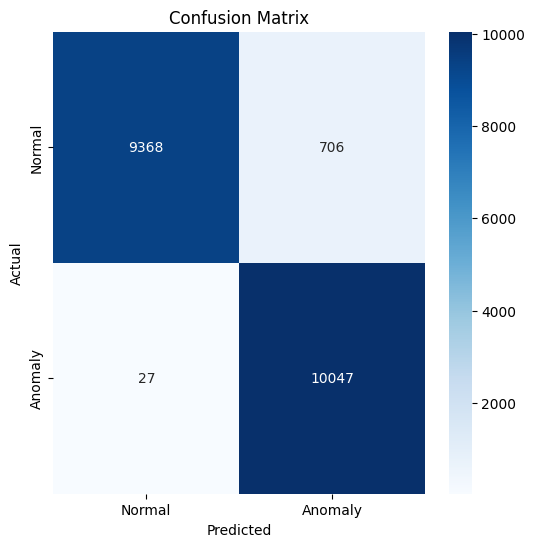

In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Function for ensemble prediction
def ensemble_predict_multiple(models, inputs, weights):
    group_predictions = [
        model.predict(input_data) * weight for model, input_data, weight in zip(models, inputs, weights)
    ]
    return np.sum(group_predictions, axis=0) / np.sum(weights)

# Step 1: Load the dataset
linux_file_path = "/content/drive/MyDrive/labeled_loge_new.csv"  # Update with your file path
linux_data = pd.read_csv(linux_file_path)

# Preprocess the data
linux_data["Message"] = linux_data["Message"].fillna('').astype(str)  # Handle missing values and ensure string format
linux_data["Label"] = linux_data["Label"].map({'Anomaly': 1, 'Normal': 0})  # Convert labels to binary

# Step 2: Tokenize and pad the "Message" column
tokenizer = Tokenizer(num_words=10000)  # Adjust vocabulary size as needed
tokenizer.fit_on_texts(linux_data["Message"])
linux_sequences = tokenizer.texts_to_sequences(linux_data["Message"])
linux_padded = pad_sequences(linux_sequences, maxlen=100)  # Pad sequences to a fixed length

# Step 3: Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
linux_inputs, linux_labels_balanced = smote.fit_resample(linux_padded, linux_data["Label"])

# Step 4: Load pre-trained models for Linux
model_paths = {
    "model_1": "/content/drive/MyDrive/root/models/cnn_model_linux_20.h5",  # Update with your model paths
    #"model_2": "/content/drive/MyDrive/root/models/lstm_model_linux_20.h5",
    #"model_3": "/content/drive/MyDrive/root/models/rnn_model_linux_20.h5"
}
models = {name: load_model(path) for name, path in model_paths.items()}

# Define model weights
model_weights = [1.0]  # Adjust weights as needed

# Step 5: Perform ensemble predictions
linux_predictions = ensemble_predict_multiple(
    list(models.values()),
    [linux_inputs] * len(models),
    model_weights
)

# Convert probabilities to binary classes (Threshold: 0.5)
linux_classes = (linux_predictions > 0.5).astype(int)

# Step 6: Save anomaly predictions
# Create a DataFrame for messages, actual labels, and predictions
linux_results = pd.DataFrame({
    "Message": linux_data["Message"],
    "Actual_Label": linux_labels_balanced,  # SMOTE-balanced labels
    "Predicted_Label": linux_classes.ravel()  # Flatten the array to 1D

})

# Filter anomalies
detected_anomalies = linux_results[linux_results["Predicted_Label"] == 1]

# Save detected anomalies to a CSV file
output_file_path = "/content/drive/MyDrive/linux_detected_anomalies_1.csv"  # Update with your desired file path
detected_anomalies.to_csv(output_file_path, index=False)
print(f"Anomaly predictions saved to: {output_file_path}")

# Step 7: Evaluate the model
accuracy = accuracy_score(linux_labels_balanced, linux_classes)
print(f"Prediction Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(linux_labels_balanced, linux_classes))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(linux_labels_balanced, linux_classes)
print(conf_matrix)

# Optional: Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(conf_matrix, class_names=["Normal", "Anomaly"])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocess Linux Logs
def preprocess_linux_logs(file_path, with_labels=True):
    """
    Preprocess Linux logs for ML/DL models.

    Args:
    - file_path (str): Path to the CSV file containing Linux logs.
    - with_labels (bool): If True, expects a 'Label' column for classification.

    Returns:
    - X_train (ndarray): Preprocessed training features.
    - X_test (ndarray): Preprocessed testing features (or None if no labels).
    - y_train (ndarray): Training labels (or None if no labels).
    - y_test (ndarray): Testing labels (or None if no labels).
    """
    # Load Linux log dataset
    df = pd.read_csv(file_path)

    # Handle missing values by filling with empty strings
    print("Handling missing values...")
    if df.isnull().any().any():
        df = df.fillna('')

    # Step 1: Handle Labels
    if with_labels and 'Label' in df.columns:
        # Convert numeric labels (0/1) to categorical labels
        if set(df['Label'].unique()) == {0, 1}:
            print("Numeric labels detected. Converting to categorical labels.")
            df['Label'] = df['Label'].map({0: 'Normal', 1: 'Anomaly'})

        # Ensure valid labels
        valid_labels = {'Anomaly', 'Normal'}
        if not set(df['Label'].unique()).issubset(valid_labels):
            raise ValueError(f"Unexpected labels in 'Label' column: {set(df['Label'].unique())}")
    elif with_labels:
        raise ValueError("The dataset must contain a 'Label' column when 'with_labels' is True.")
    else:
        print("No labels provided. Proceeding with unsupervised preprocessing.")

    # Step 2: Encode categorical features (Host, Log_Level)
    print("Encoding categorical features...")
    label_encoder_host = LabelEncoder()
    df['Host_Encoded'] = label_encoder_host.fit_transform(df['Host'])

    label_encoder_level = LabelEncoder()
    df['Log_Level_Encoded'] = label_encoder_level.fit_transform(df['Log_Level'])

    # Step 3: Tokenize and pad the 'Message' column
    print("Tokenizing and padding message column...")
    tokenizer = Tokenizer(num_words=1000)  # Adjust num_words as needed
    tokenizer.fit_on_texts(df['Message'])
    X_message = tokenizer.texts_to_sequences(df['Message'])
    X_message_padded = pad_sequences(X_message, padding='post', maxlen=50)  # Adjust maxlen as needed

    # Step 4: Combine features
    print("Combining features...")
    X_host = np.array(df['Host_Encoded']).reshape(-1, 1)
    X_log_level = np.array(df['Log_Level_Encoded']).reshape(-1, 1)
    X_combined = np.concatenate([X_host, X_log_level, X_message_padded], axis=1)

    # Step 5: Prepare labels if available
    if with_labels:
        y = df['Label'].map({'Anomaly': 1, 'Normal': 0}).values
    else:
        y = None

    # Step 6: Train-Test Split
    if with_labels:
        print("Splitting data into training and testing sets...")
        X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X_combined, None, None, None

    # Step 7: Handle class imbalance (if labels are available)
    if with_labels:
        print("Handling class imbalance...")
        undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    # Step 8: Reshape data for CNN/LSTM models
    print("Reshaping data for CNN/LSTM models...")
    X_train_resampled_cnn = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
    if X_test is not None:
        X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:
        X_test_cnn = None

    return X_train_resampled_cnn, X_test_cnn, y_train_resampled, y_test

# Example Usage
if __name__ == "__main__":
    # Paths
    linux_log_file_path = "/content/drive/MyDrive/labeled_logs_linux.csv"

    # Preprocess Linux logs
    print("Processing Linux logs...")
    X_train, X_test, y_train, y_test = preprocess_linux_logs(linux_log_file_path, with_labels=True)

    # Output shapes
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape if X_test is not None else None}")
    print(f"y_train shape: {y_train.shape if y_train is not None else None}")
    print(f"y_test shape: {y_test.shape if y_test is not None else None}")


Processing Linux logs...
Handling missing values...
Encoding categorical features...
Tokenizing and padding message column...
Combining features...
Splitting data into training and testing sets...
Handling class imbalance...
Reshaping data for CNN/LSTM models...
X_train shape: (114, 52, 1)
X_test shape: (2026, 52, 1)
y_train shape: (114,)
y_test shape: (2026,)


Preprocessing Linux logs...
Handling missing values...
Encoding categorical features...
Tokenizing and padding message column...
Combining features...
Splitting data into training and testing sets...
Handling class imbalance with oversampling...
Reshaping data for CNN models...
Creating and training the CNN model...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7919 - loss: 1.1028 - val_accuracy: 0.7042 - val_loss: 0.3935
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8917 - loss: 0.2439 - val_accuracy: 0.9442 - val_loss: 0.2731
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9277 - loss: 0.1974 - val_accuracy: 1.0000 - val_loss: 0.2019
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9336 - loss: 0.1826 - val_accuracy: 1.0000 - val_loss: 0.1055
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9409 - loss: 0.1472 - val_accuracy: 1.0000 - val_loss: 0.1253
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9454 - loss: 0.1337 - val_accuracy: 1.0000 - val_loss: 0.0737
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9534 - loss: 0.1237 - val_accuracy: 1.0000 - val_loss: 0.0847
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9579 - loss: 0.1121 - val_accuracy: 1.000

Saving the CNN model...


Loading the saved CNN model...
Performing predictions...
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation:
Accuracy: 0.9674
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2012
           1       0.13      0.64      0.21        14

    accuracy                           0.97      2026
   macro avg       0.56      0.81      0.60      2026
weighted avg       0.99      0.97      0.98      2026

Confusion Matrix:
[[1951   61]
 [   5    9]]


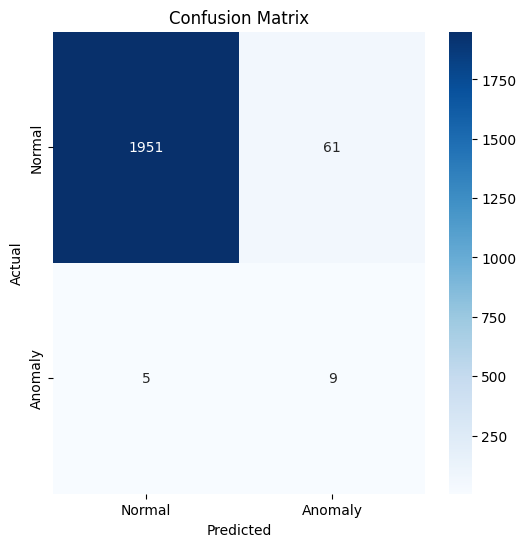

Saving predictions to CSV...
Predictions saved to /content/drive/MyDrive/Linux_Log_Predictions_CNN.csv.


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Preprocessing Function
def preprocess_linux_logs(file_path, with_labels=True):
    """
    Preprocess Linux logs for CNN model.

    Args:
    - file_path (str): Path to the CSV file containing Linux logs.
    - with_labels (bool): If True, expects a 'Label' column for classification.

    Returns:
    - X_train (ndarray): Preprocessed training features.
    - X_test (ndarray): Preprocessed testing features.
    - y_train (ndarray): Training labels.
    - y_test (ndarray): Testing labels.
    """
    # Load dataset
    df = pd.read_csv(file_path)

    # Handle missing values
    print("Handling missing values...")
    df = df.fillna('')

    # Step 1: Encode categorical features (Host, Log_Level)
    print("Encoding categorical features...")
    df['Host_Encoded'] = LabelEncoder().fit_transform(df['Host'])
    df['Log_Level_Encoded'] = LabelEncoder().fit_transform(df['Log_Level'])

    # Step 2: Tokenize and pad the 'Message' column
    print("Tokenizing and padding message column...")
    tokenizer = Tokenizer(num_words=1000)
    tokenizer.fit_on_texts(df['Message'])
    X_message = tokenizer.texts_to_sequences(df['Message'])
    X_message_padded = pad_sequences(X_message, padding='post', maxlen=50)

    # Step 3: Combine features
    print("Combining features...")
    X_host = np.array(df['Host_Encoded']).reshape(-1, 1)
    X_log_level = np.array(df['Log_Level_Encoded']).reshape(-1, 1)
    X_combined = np.concatenate([X_host, X_log_level, X_message_padded], axis=1)

    # Step 4: Prepare labels if available
    if with_labels and 'Label' in df.columns:
        y = df['Label'].map({'Anomaly': 1, 'Normal': 0}).values
    else:
        y = None

    # Step 5: Train-Test Split
    if with_labels:
        print("Splitting data into training and testing sets...")
        X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X_combined, None, None, None

    # Step 6: Handle class imbalance with oversampling
    if y_train is not None:
        print("Handling class imbalance with oversampling...")
        oversampler = RandomOverSampler(sampling_strategy=1.0, random_state=42)
        X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    # Step 7: Reshape for CNN models
    print("Reshaping data for CNN models...")
    X_train_cnn = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
    if X_test is not None:
        X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:
        X_test_cnn = None

    return X_train_cnn, X_test_cnn, y_train_resampled, y_test


# Define CNN Model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Training, Saving, and Predicting Pipeline
if __name__ == "__main__":
    # Paths
    linux_log_file_path = "/content/drive/MyDrive/labeled_logs_linux.csv"
    cnn_model_save_path = "/content/drive/MyDrive/cnn_model_new_linux.h5"
    prediction_output_file_path = "/content/drive/MyDrive/Linux_Log_Predictions_CNN.csv"

    # Preprocess Linux logs
    print("Preprocessing Linux logs...")
    X_train, X_test, y_train, y_test = preprocess_linux_logs(linux_log_file_path, with_labels=True)

    # Create and train CNN model
    print("Creating and training the CNN model...")
    model = create_cnn_model(X_train.shape[1:])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

    # Save the model
    print("Saving the CNN model...")
    model.save(cnn_model_save_path)

    # Load the saved model
    print("Loading the saved CNN model...")
    model = load_model(cnn_model_save_path)

    # Perform predictions
    print("Performing predictions...")
    predictions = model.predict(X_test)
    predicted_classes = (predictions > 0.5).astype(int)

    # Evaluate the model
    print("Evaluation:")
    accuracy = accuracy_score(y_test, predicted_classes)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_classes))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predicted_classes))

conf_matrix = confusion_matrix(y_test, predicted_classes)

# Optional: Plot Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(conf_matrix, class_names=["Normal", "Anomaly"])


   # Save predictions to CSV
print("Saving predictions to CSV...")
test_df = pd.read_csv(linux_log_file_path)

# Align the test data with y_test and X_test
test_indices = test_df.index[-len(y_test):]  # Use the last `len(y_test)` rows from the test set
test_df = test_df.iloc[test_indices]

# Add predicted labels
test_df['Predicted_Label'] = predicted_classes

# Save to CSV
test_df.to_csv(prediction_output_file_path, index=False)
print(f"Predictions saved to {prediction_output_file_path}.")



Preprocessing Linux logs...
Handling missing values...
Encoding categorical features...
Tokenizing and padding message column...
Combining features...
Splitting data into training and testing sets...
Handling class imbalance with oversampling...
Reshaping data for LSTM models...
Creating and training the LSTM model...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


404/404 ━━━━━━━━━━━━━━━━━━━━ 52s 120ms/step - accuracy: 0.6936 - loss: 3626.2148 - val_accuracy: 0.1758 - val_loss: 80.5133
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 50s 123ms/step - accuracy: 0.7542 - loss: 2634.7498 - val_accuracy: 0.9389 - val_loss: 0.1643
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 80s 119ms/step - accuracy: 0.8326 - loss: 1224.3303 - val_accuracy: 0.7309 - val_loss: 0.2846
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 52s 129ms/step - accuracy: 0.7841 - loss: 348.4163 - val_accuracy: 0.7309 - val_loss: 0.3389
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 77s 118ms/step - accuracy: 0.7807 - loss: 161.9061 - val_accuracy: 0.7309 - val_loss: 0.3783
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 88s 134ms/step - accuracy: 0.7761 - loss: 101.9009 - val_accuracy: 0.7309 - val_loss: 0.3899
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 75s 118ms/step - accuracy: 0.7725 - loss: 66.5148 - val_accuracy: 0.7309 - val_loss: 0.3825
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 48s 118ms/step - accuracy: 0.7627 - l

Saving the LSTM model...
Loading the saved LSTM model...
Performing predictions...
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
Evaluation:
Accuracy: 0.8850
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2012
           1       0.06      1.00      0.11        14

    accuracy                           0.88      2026
   macro avg       0.53      0.94      0.52      2026
weighted avg       0.99      0.88      0.93      2026

Confusion Matrix:
[[1779  233]
 [   0   14]]


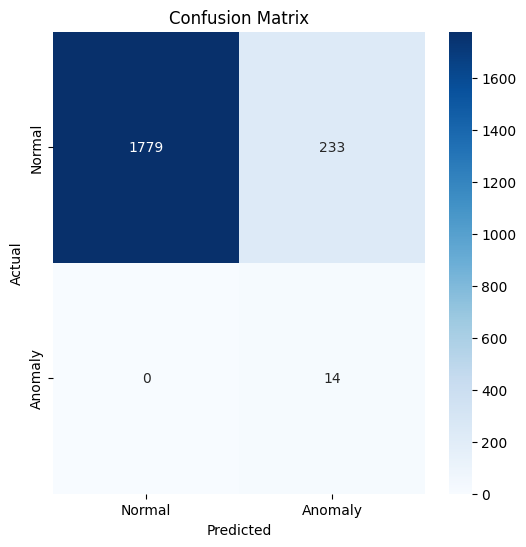

Saving predictions to CSV...
Predictions saved to /content/drive/MyDrive/Linux_Log_Predictions_LSTM.csv.


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Function
def preprocess_linux_logs(file_path, with_labels=True):
    """
    Preprocess Linux logs for LSTM model.

    Args:
    - file_path (str): Path to the CSV file containing Linux logs.
    - with_labels (bool): If True, expects a 'Label' column for classification.

    Returns:
    - X_train (ndarray): Preprocessed training features.
    - X_test (ndarray): Preprocessed testing features.
    - y_train (ndarray): Training labels.
    - y_test (ndarray): Testing labels.
    """
    # Load dataset
    df = pd.read_csv(file_path)

    # Handle missing values
    print("Handling missing values...")
    df = df.fillna('')

    # Step 1: Encode categorical features (Host, Log_Level)
    print("Encoding categorical features...")
    df['Host_Encoded'] = LabelEncoder().fit_transform(df['Host'])
    df['Log_Level_Encoded'] = LabelEncoder().fit_transform(df['Log_Level'])

    # Step 2: Tokenize and pad the 'Message' column
    print("Tokenizing and padding message column...")
    tokenizer = Tokenizer(num_words=1000)
    tokenizer.fit_on_texts(df['Message'])
    X_message = tokenizer.texts_to_sequences(df['Message'])
    X_message_padded = pad_sequences(X_message, padding='post', maxlen=50)

    # Step 3: Combine features
    print("Combining features...")
    X_host = np.array(df['Host_Encoded']).reshape(-1, 1)
    X_log_level = np.array(df['Log_Level_Encoded']).reshape(-1, 1)
    X_combined = np.concatenate([X_host, X_log_level, X_message_padded], axis=1)

    # Step 4: Prepare labels if available
    if with_labels and 'Label' in df.columns:
        y = df['Label'].map({'Anomaly': 1, 'Normal': 0}).values
    else:
        y = None

    # Step 5: Train-Test Split
    if with_labels:
        print("Splitting data into training and testing sets...")
        X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X_combined, None, None, None

    # Step 6: Handle class imbalance with oversampling
    if y_train is not None:
        print("Handling class imbalance with oversampling...")
        oversampler = RandomOverSampler(sampling_strategy=1.0, random_state=42)
        X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    # Step 7: Reshape for LSTM models
    print("Reshaping data for LSTM models...")
    X_train_lstm = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
    if X_test is not None:
        X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:
        X_test_lstm = None

    return X_train_lstm, X_test_lstm, y_train_resampled, y_test


# Define LSTM Model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True, activation='relu'),
        Dropout(0.3),
        LSTM(64, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Training, Saving, and Predicting Pipeline
if __name__ == "__main__":
    # Paths
    linux_log_file_path = "/content/drive/MyDrive/labeled_logs_linux.csv"
    lstm_model_save_path = "/content/drive/MyDrive/lstm_model_new_linux.h5"
    prediction_output_file_path = "/content/drive/MyDrive/Linux_Log_Predictions_LSTM.csv"

    # Preprocess Linux logs
    print("Preprocessing Linux logs...")
    X_train, X_test, y_train, y_test = preprocess_linux_logs(linux_log_file_path, with_labels=True)

    # Create and train LSTM model
    print("Creating and training the LSTM model...")
    model = create_lstm_model(X_train.shape[1:])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

    # Save the model
    print("Saving the LSTM model...")
    model.save(lstm_model_save_path)

    # Load the saved model
    print("Loading the saved LSTM model...")
    model = load_model(lstm_model_save_path)

    # Perform predictions
    print("Performing predictions...")
    predictions = model.predict(X_test)
    predicted_classes = (predictions > 0.5).astype(int)

    # Evaluate the model
    print("Evaluation:")
    accuracy = accuracy_score(y_test, predicted_classes)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_classes))
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, predicted_classes)
    print(conf_matrix)

    # Optional: Plot Confusion Matrix
    def plot_confusion_matrix(conf_matrix, class_names):
        plt.figure(figsize=(6, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    plot_confusion_matrix(conf_matrix, class_names=["Normal", "Anomaly"])

    # Save predictions to CSV
    print("Saving predictions to CSV...")
    test_df = pd.read_csv(linux_log_file_path)

    # Align the test data with y_test and X_test
    test_indices = test_df.index[-len(y_test):]  # Use the last `len(y_test)` rows from the test set
    test_df = test_df.iloc[test_indices]

    # Add predicted labels
    test_df['Predicted_Label'] = predicted_classes

    # Save to CSV
    test_df.to_csv(prediction_output_file_path, index=False)
    print(f"Predictions saved to {prediction_output_file_path}.")


Preprocessing Linux logs...
Handling missing values...
Encoding categorical features...
Tokenizing and padding message column...
Combining features...
Splitting data into training and testing sets...
Handling class imbalance with oversampling...
Reshaping data for RNN models...
Creating and training the RNN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8076 - loss: 0.4542 - val_accuracy: 0.5482 - val_loss: 1.0381
Epoch 2/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.8582 - loss: 0.2900 - val_accuracy: 0.5482 - val_loss: 0.6741
Epoch 3/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.8097 - loss: 0.5804 - val_accuracy: 0.6524 - val_loss: 0.5945
Epoch 4/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.8097 - loss: 0.3656 - val_accuracy: 0.6257 - val_loss: 0.6031
Epoch 5/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.8228 - loss: 0.4056 - val_accuracy: 0.5501 - val_loss: 0.8677
Epoch 6/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.7991 - loss: 0.3546 - val_accuracy: 0.7057 - val_loss: 0.6279
Epoch 7/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8647 - loss: 0.2901 - val_accuracy: 0.9389 - val_loss: 0.4817
Epoch 8/20
404/404 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.8964 - loss: 0.7413 - 

Saving the RNN model...
Loading the saved RNN model...
Performing predictions...
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Evaluation:
Accuracy: 0.9245
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2012
           1       0.06      0.64      0.11        14

    accuracy                           0.92      2026
   macro avg       0.53      0.78      0.53      2026
weighted avg       0.99      0.92      0.95      2026

Confusion Matrix:
[[1864  148]
 [   5    9]]


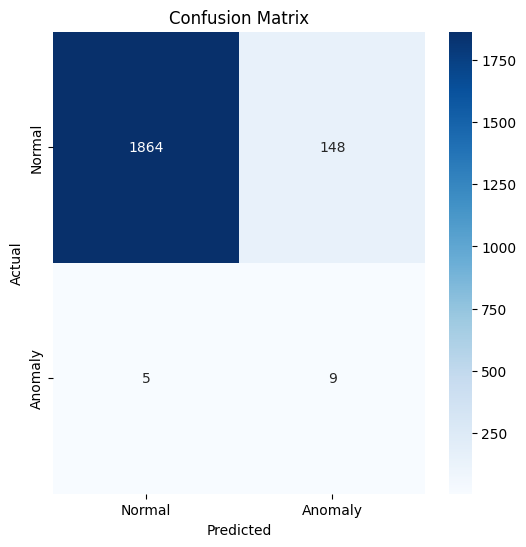

Saving predictions to CSV...
Predictions saved to /content/drive/MyDrive/Linux_Log_Predictions_RNN.csv.


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Function
def preprocess_linux_logs(file_path, with_labels=True):
    """
    Preprocess Linux logs for RNN model.

    Args:
    - file_path (str): Path to the CSV file containing Linux logs.
    - with_labels (bool): If True, expects a 'Label' column for classification.

    Returns:
    - X_train (ndarray): Preprocessed training features.
    - X_test (ndarray): Preprocessed testing features.
    - y_train (ndarray): Training labels.
    - y_test (ndarray): Testing labels.
    """
    # Load dataset
    df = pd.read_csv(file_path)

    # Handle missing values
    print("Handling missing values...")
    df = df.fillna('')

    # Step 1: Encode categorical features (Host, Log_Level)
    print("Encoding categorical features...")
    df['Host_Encoded'] = LabelEncoder().fit_transform(df['Host'])
    df['Log_Level_Encoded'] = LabelEncoder().fit_transform(df['Log_Level'])

    # Step 2: Tokenize and pad the 'Message' column
    print("Tokenizing and padding message column...")
    tokenizer = Tokenizer(num_words=1000)
    tokenizer.fit_on_texts(df['Message'])
    X_message = tokenizer.texts_to_sequences(df['Message'])
    X_message_padded = pad_sequences(X_message, padding='post', maxlen=50)

    # Step 3: Combine features
    print("Combining features...")
    X_host = np.array(df['Host_Encoded']).reshape(-1, 1)
    X_log_level = np.array(df['Log_Level_Encoded']).reshape(-1, 1)
    X_combined = np.concatenate([X_host, X_log_level, X_message_padded], axis=1)

    # Step 4: Prepare labels if available
    if with_labels and 'Label' in df.columns:
        y = df['Label'].map({'Anomaly': 1, 'Normal': 0}).values
    else:
        y = None

    # Step 5: Train-Test Split
    if with_labels:
        print("Splitting data into training and testing sets...")
        X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X_combined, None, None, None

    # Step 6: Handle class imbalance with oversampling
    if y_train is not None:
        print("Handling class imbalance with oversampling...")
        oversampler = RandomOverSampler(sampling_strategy=1.0, random_state=42)
        X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    # Step 7: Reshape for RNN models
    print("Reshaping data for RNN models...")
    X_train_rnn = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
    if X_test is not None:
        X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:
        X_test_rnn = None

    return X_train_rnn, X_test_rnn, y_train_resampled, y_test


# Define RNN Model
def create_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(128, input_shape=input_shape, return_sequences=True, activation='relu'),
        Dropout(0.3),
        SimpleRNN(64, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Training, Saving, and Predicting Pipeline
if __name__ == "__main__":
    # Paths
    linux_log_file_path = "/content/drive/MyDrive/labeled_logs_linux.csv"
    rnn_model_save_path = "/content/drive/MyDrive/rnn_model_new_linux.h5"
    prediction_output_file_path = "/content/drive/MyDrive/Linux_Log_Predictions_RNN.csv"

    # Preprocess Linux logs
    print("Preprocessing Linux logs...")
    X_train, X_test, y_train, y_test = preprocess_linux_logs(linux_log_file_path, with_labels=True)

    # Create and train RNN model
    print("Creating and training the RNN model...")
    model = create_rnn_model(X_train.shape[1:])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

    # Save the model
    print("Saving the RNN model...")
    model.save(rnn_model_save_path)

    # Load the saved model
    print("Loading the saved RNN model...")
    model = load_model(rnn_model_save_path)

    # Perform predictions
    print("Performing predictions...")
    predictions = model.predict(X_test)
    predicted_classes = (predictions > 0.5).astype(int)

    # Evaluate the model
    print("Evaluation:")
    accuracy = accuracy_score(y_test, predicted_classes)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_classes))
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test, predicted_classes)
    print(conf_matrix)

    # Optional: Plot Confusion Matrix
    def plot_confusion_matrix(conf_matrix, class_names):
        plt.figure(figsize=(6, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    plot_confusion_matrix(conf_matrix, class_names=["Normal", "Anomaly"])

    # Save predictions to CSV
    print("Saving predictions to CSV...")
    test_df = pd.read_csv(linux_log_file_path)

    # Align the test data with y_test and X_test
    test_indices = test_df.index[-len(y_test):]  # Use the last `len(y_test)` rows from the test set
    test_df = test_df.iloc[test_indices]

    # Add predicted labels
    test_df['Predicted_Label'] = predicted_classes

    # Save to CSV
    test_df.to_csv(prediction_output_file_path, index=False)
    print(f"Predictions saved to {prediction_output_file_path}.")
